In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score

In [6]:
wine=pd.read_csv('DS2_C5_S4_Wine_Data_Practice.data',header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.shape

(178, 14)

In [8]:
wine.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<AxesSubplot:>

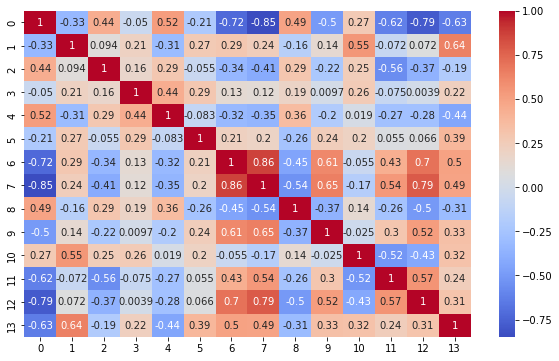

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(wine.corr(),annot=True,cmap='coolwarm')

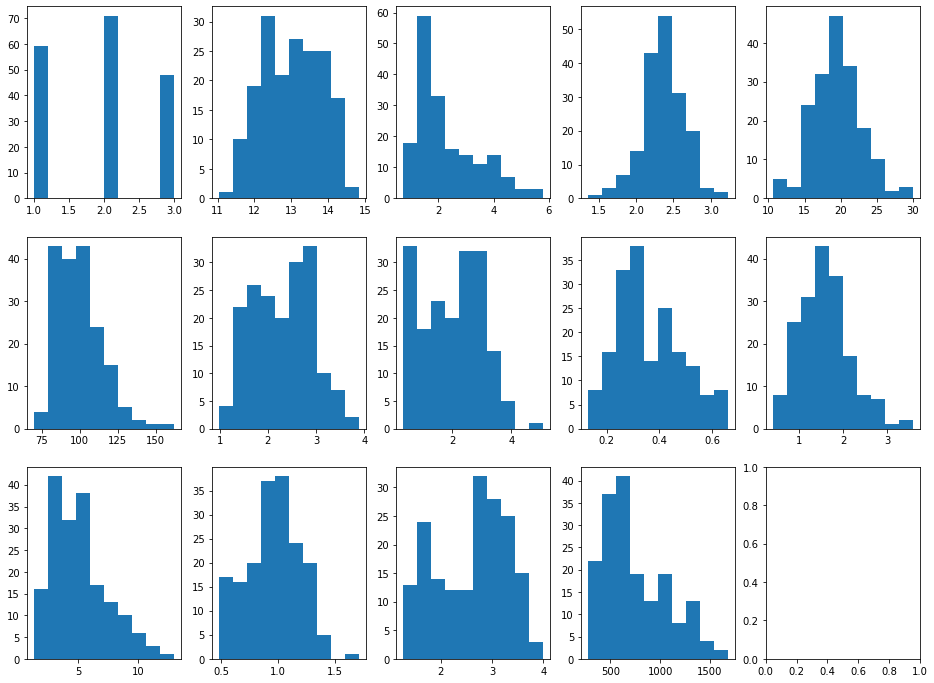

In [39]:
fig,ax=plt.subplots(3,5,figsize=(16,12))
for i in range(0,14):
    ax[i//5,i%5].hist(wine.iloc[:,i])

In [40]:
X=wine.iloc[:,1:]
y=wine.iloc[:,0]

In [41]:
X=StandardScaler().fit_transform(X)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
y.shape

(178,)

In [44]:
model=GaussianNB()

In [45]:
model.fit(X_train,y_train)

GaussianNB()

In [46]:
model.score(X_test,y_test)

1.0

In [47]:
y_pred=model.predict(X_test)

In [50]:
metrics.accuracy_score(y_pred,y_test)

1.0

(array([[21.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., 14.],
        [22.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 13.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.]]),
 array([5.24692887e-59, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 3 BarContainer objects>)

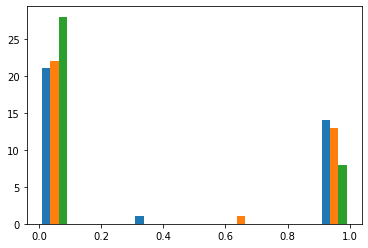

In [63]:
y_prob=model.predict_proba(X_test)
plt.hist(y_prob)

In [52]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

In [64]:
model1=DecisionTreeClassifier(max_depth=8)

In [65]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [66]:
y_pred=model1.predict(X_test)

In [67]:
model1.score(X_test,y_test)

0.9444444444444444

In [68]:
model1.score(X_train,y_train)

1.0

[Text(0.5, 0.9, '9 <= -0.536\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]\nclass = 2'),
 Text(0.3, 0.7, '12 <= 0.814\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]\nclass = 2'),
 Text(0.2, 0.5, '2 <= 2.571\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]\nclass = 2'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]\nclass = 2'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 1'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = 1'),
 Text(0.7, 0.7, '6 <= -0.632\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]\nclass = 1'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = 3'),
 Text(0.8, 0.5, '12 <= -0.071\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]\nclass = 1'),
 Text(0.7, 0.3, '0 <= 0.178\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]\nclass = 2'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]\nclass = 2'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 1'),
 Text

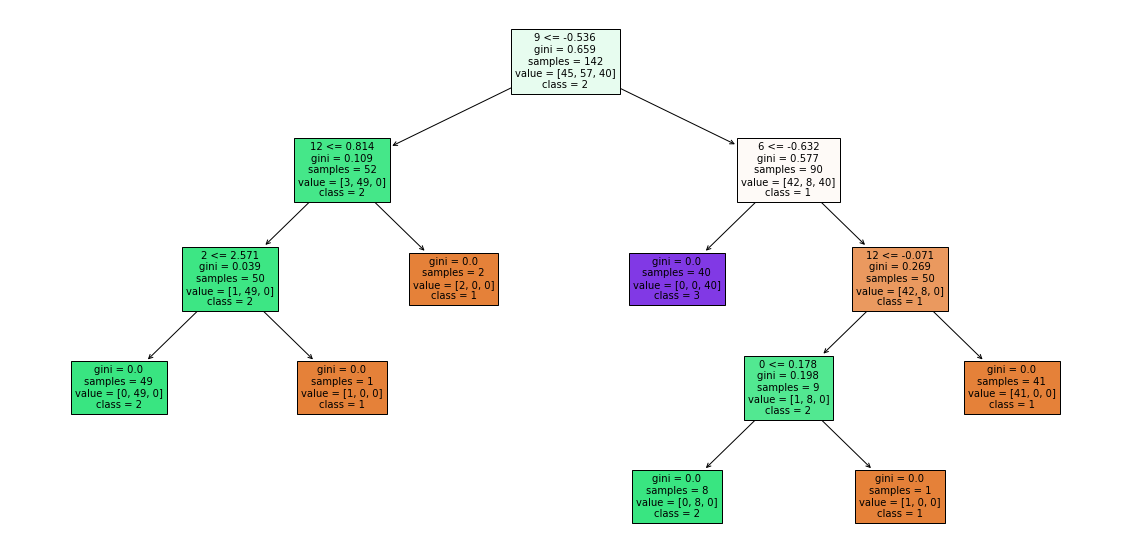

In [69]:
from sklearn import tree
plt.figure(figsize=(20,10))
cs=[]
for i in range(1,14):
    cs.append(str(i))
tree.plot_tree(model1,fontsize=10,feature_names=wine.columns,class_names=cs,filled=True)

In [72]:
model.score(X_test,y_test),model1.score(X_test,y_test)

(1.0, 0.9444444444444444)